<a href="https://colab.research.google.com/github/Messbah/Tensorflow_Practice/blob/main/Medical_Cost_Prediction_with_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
insurance = pd.read_csv("/content/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
#The dataset has some numerical columns and some obj. We will first do numerical encoding to this dataset: One-Hot Encoding, Label Binarizer
from sklearn.preprocessing import LabelBinarizer
insurance["sex"]=LabelBinarizer().fit_transform(insurance.sex) #male =1, female =0
insurance["smoker"]=LabelBinarizer().fit_transform(insurance.smoker) # yes =1, no = 0
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [53]:
#now we will use one hot encoding for the region column
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [54]:
X = insurance_one_hot.drop("charges", axis =1) #input features
y = insurance_one_hot["charges"] #output feature

In [55]:
# splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [56]:
# Model creation
model_in = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                
])
model_in.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["mae"])
history = model_in.fit(X_train, y_train, epochs=500, verbose=0)

In [57]:
charges_pred = model_in.predict(X_test)
len(charges_pred)

268

In [80]:
def plot_predictions(train_data, 
                     train_labels,
                     test_data,
                     test_labels,
                     predictions):
  plt.figure(figsize=(10,7))
  #plt.scatter(train_data,train_labels, c="b", label="Trainning Data")
  plt.scatter(test_data,test_labels, c= "g", label="Testing Data")
  plt.scatter(test_data,predictions, c="r", label="Predictions")
  plt.legend()

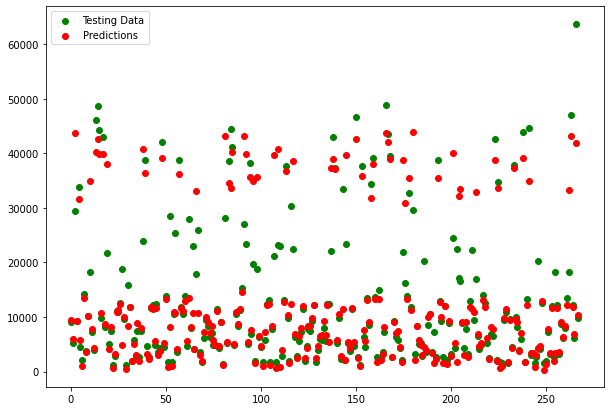

In [81]:
#plot_predictions(X_train,y_train,X_test,y_test,charges_pred)
plot_predictions(np.arange(1070),y_train,np.arange(268),y_test,charges_pred)

In [59]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, charges_pred.shape

((1070, 9), (1070,), (268, 9), (268,), (268, 1))

In [68]:
print(y_train)

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64


Text(0.5, 0, 'epochs')

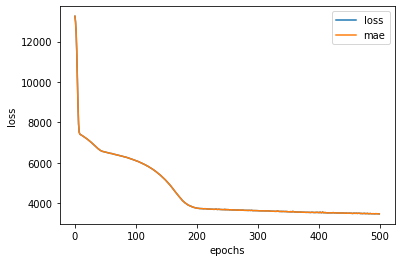

In [49]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [113]:
model_in_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)                                
])
model_in_2.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["mae"])
history_2 = model_in_2.fit(X_train, y_train, epochs=500, verbose=0)

In [120]:
model_in_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)                                
])
model_in_3.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["mae"])
history_3 = model_in_3.fit(X_train, y_train, epochs=500, verbose=0)

Text(0.5, 0, 'epochs')

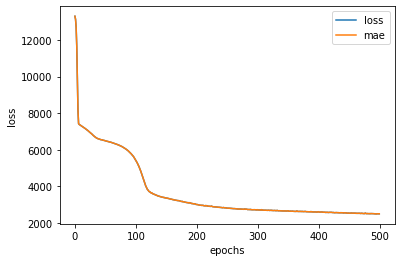

In [102]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

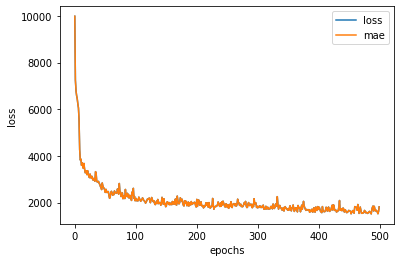

In [121]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [115]:
charges_pred_2 = model_in_2.predict(X_test)
len(charges_pred_2)

268

In [122]:
charges_pred_3 = model_in_3.predict(X_test)
len(charges_pred_3)

268

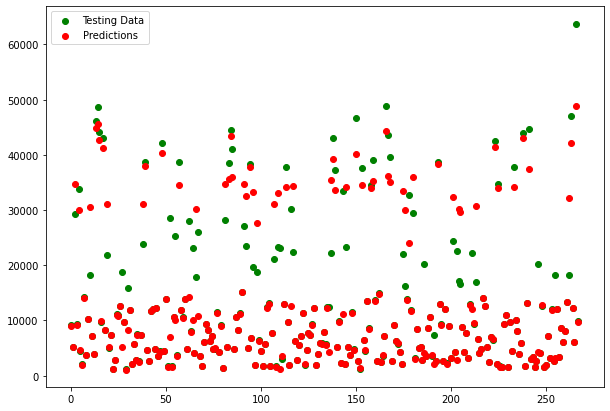

In [117]:
plot_predictions(np.arange(1070),y_train,np.arange(268),y_test,charges_pred_2)


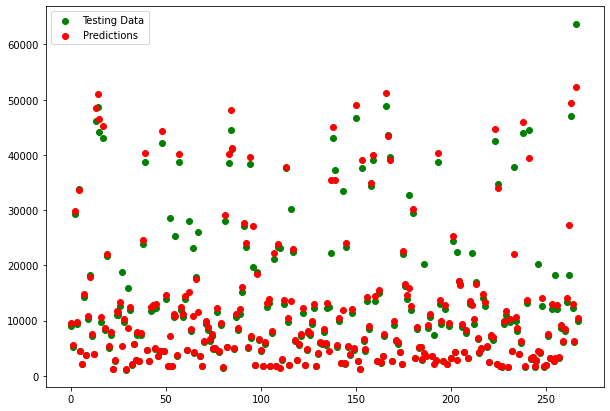

In [123]:
plot_predictions(np.arange(1070),y_train,np.arange(268),y_test,charges_pred_3)

In [105]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(charges_pred_2))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2207.7505>

In [106]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(charges_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3175.734>

In [124]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(charges_pred_3))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1652.0293>